## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 電腦沒有 GPU

In [2]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True, minmax=False):
    if minmax:
        x = 2 * (((x-x.min())/(x.max()-x.min())) - 0.5)
    else:
        x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[64, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                196672    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.9504 - accuracy: 0.2995 - val_loss: 1.8117 - val_accuracy: 0.3496
Epoch 2/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.7668 - accuracy: 0.3696 - val_loss: 1.7400 - val_accuracy: 0.3829
Epoch 3/100
50000/50000 [==============================] - 8s 164us/step - loss: 1.6971 - accuracy: 0.3935 - val_loss: 1.6628 - val_accuracy: 0.4064
Epoch 4/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.6429 - accuracy: 0.4139 - val_loss: 1.6289 - val_accuracy: 0.4153
Epoch 5/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.6069 - accuracy: 0.4262 - val_loss: 1.6075 - val_accuracy: 0.4285
Epoch 6/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.5705 - accuracy: 0.4385 - val_loss: 1.5665 - val_accuracy: 0.4371
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 140us/step - loss: 1.2560 - accuracy: 0.5517 - val_loss: 1.4527 - val_accuracy: 0.4848
Epoch 56/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.2449 - accuracy: 0.5531 - val_loss: 1.4187 - val_accuracy: 0.4962
Epoch 57/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.2468 - accuracy: 0.5549 - val_loss: 1.4286 - val_accuracy: 0.4973
Epoch 58/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.2470 - accuracy: 0.5534 - val_loss: 1.4402 - val_accuracy: 0.4909
Epoch 59/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.2403 - accuracy: 0.5563 - val_loss: 1.4625 - val_accuracy: 0.4873
Epoch 60/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.2397 - accuracy: 0.5556 - val_loss: 1.4644 - val_accuracy: 0.4785
Epoch 61/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.2335 - accuracy: 0.5585 - val

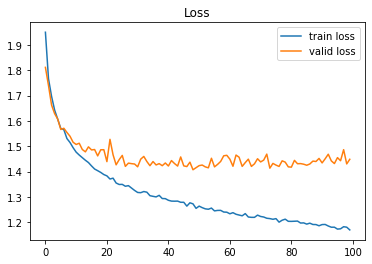

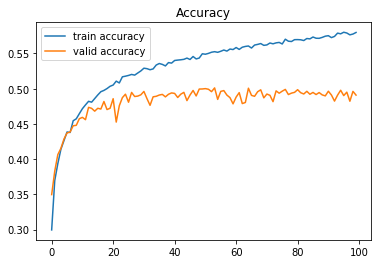

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# preproc_x 替換成 min/max -1 ~ 1 間

In [11]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train, True, True)
x_test = preproc_x(x_test, True, True)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                196672    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.7423 - accuracy: 0.3823 - val_loss: 1.5805 - val_accuracy: 0.4456
Epoch 2/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.5237 - accuracy: 0.4639 - val_loss: 1.5138 - val_accuracy: 0.4653
Epoch 3/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.4392 - accuracy: 0.4940 - val_loss: 1.4613 - val_accuracy: 0.4838
Epoch 4/100
50000/50000 [==============================] - 7s 130us/step - loss: 1.3727 - accuracy: 0.5173 - val_loss: 1.4400 - val_accuracy: 0.4949
Epoch 5/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.3205 - accuracy: 0.5367 - val_loss: 1.4391 - val_accuracy: 0.4934
Epoch 6/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.2807 - accuracy: 0.5508 - val_loss: 1.4209 - val_accuracy: 0.5037
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 5s 108us/step - loss: 0.6170 - accuracy: 0.7824 - val_loss: 2.1350 - val_accuracy: 0.4800
Epoch 56/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.6098 - accuracy: 0.7872 - val_loss: 2.1154 - val_accuracy: 0.4826
Epoch 57/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.5985 - accuracy: 0.7910 - val_loss: 2.1792 - val_accuracy: 0.4833
Epoch 58/100
50000/50000 [==============================] - 6s 110us/step - loss: 0.5928 - accuracy: 0.7902 - val_loss: 2.1921 - val_accuracy: 0.4780
Epoch 59/100
50000/50000 [==============================] - 6s 110us/step - loss: 0.5880 - accuracy: 0.7919 - val_loss: 2.1942 - val_accuracy: 0.4772
Epoch 60/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.5898 - accuracy: 0.7916 - val_loss: 2.2495 - val_accuracy: 0.4757
Epoch 61/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.5734 - accuracy: 0.7966 - val

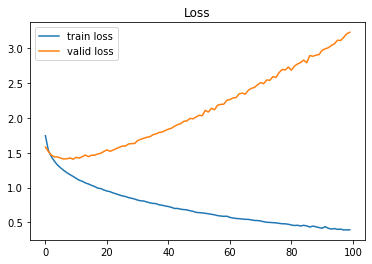

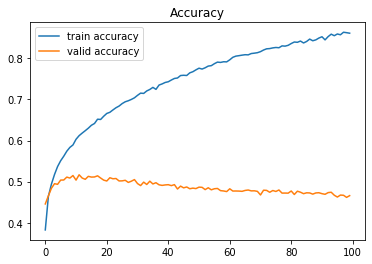

In [14]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# mlp 疊更深 (9 層)

In [19]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train, True, True)
x_test = preproc_x(x_test, True, True)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
model = build_mlp(input_shape=x_train.shape[1:], output_units=10, num_neurons=[64, 64, 64, 32, 32, 32, 16, 16, 16])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 64)                196672    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                1056      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                1056

In [21]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.9334 - accuracy: 0.2888 - val_loss: 1.7266 - val_accuracy: 0.3833
Epoch 2/100
50000/50000 [==============================] - 6s 124us/step - loss: 1.6586 - accuracy: 0.4058 - val_loss: 1.6281 - val_accuracy: 0.4166
Epoch 3/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.5538 - accuracy: 0.4462 - val_loss: 1.5509 - val_accuracy: 0.4473
Epoch 4/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.4830 - accuracy: 0.4729 - val_loss: 1.5058 - val_accuracy: 0.4675
Epoch 5/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.4300 - accuracy: 0.4923 - val_loss: 1.4949 - val_accuracy: 0.4758
Epoch 6/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.3769 - accuracy: 0.5122 - val_loss: 1.4703 - val_accuracy: 0.4795
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 141us/step - loss: 0.6949 - accuracy: 0.7586 - val_loss: 1.9244 - val_accuracy: 0.4863
Epoch 56/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.6870 - accuracy: 0.7602 - val_loss: 1.9347 - val_accuracy: 0.4806
Epoch 57/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.6836 - accuracy: 0.7626 - val_loss: 1.9612 - val_accuracy: 0.4864
Epoch 58/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.6725 - accuracy: 0.7671 - val_loss: 2.0251 - val_accuracy: 0.4765
Epoch 59/100
50000/50000 [==============================] - 7s 149us/step - loss: 0.6571 - accuracy: 0.7720 - val_loss: 1.9951 - val_accuracy: 0.4831
Epoch 60/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.6687 - accuracy: 0.7677 - val_loss: 1.9939 - val_accuracy: 0.4866
Epoch 61/100
50000/50000 [==============================] - 7s 145us/step - loss: 0.6537 - accuracy: 0.7742 - val

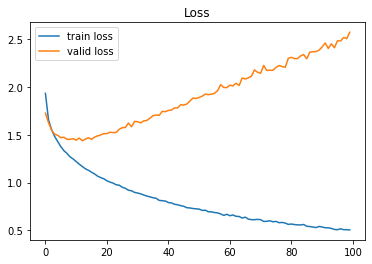

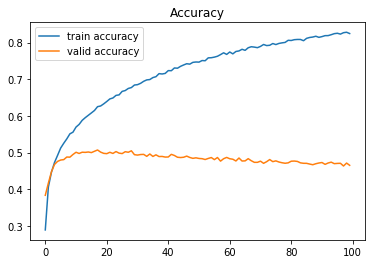

In [22]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# 層數增加後，valid loss 雖有變低，但仍然很不理想